# Uniform distribution

## Definitions

In [1]:
from sympy import *
import numpy as np

In [2]:
states = symbols('t0:10') # Sufficient for up to ten messages
messages = symbols('m0:10')
actions = symbols('a0:10')
t, b = symbols('t b', positive=True)

In [3]:
def U_S(state, action, bias):
        # return 0 - (action - state - bias)**2 # Crawford & Sobel 1982
        return  1 - (action - state - (1 - state)*bias)**2
    
def U_R(state, action):
    # return 0 - (action - state - bias)**2 # Crawford & Sobel 1982
    return  1 - (action - state)**2

## Solutions

In [4]:
def solve_messages(m):
    # Define sender symbols
    sender_partition = list(states[:(m - 1)])
    sender_points = [0] + list(states[:(m - 1)]) + [1]
    # Define receiver symbols
    receiver_partition = list(actions[:m])
    # Define sender expected utility
    EU_S = sum([integrate(U_S(t, item, b), (t, sender_points[i], sender_points[i+1])) for i, item in enumerate(receiver_partition)])
    EU_R = EU_S.subs(b,0)
    # Maximize sender expected utility
    sender_solutions = [Eq(point, solve(diff(EU_S, point), point)[0]) for point in sender_partition]
    # Maximize receiver expected utility
    receiver_solutions = [Eq(point, solve(diff(EU_R, point), point)[0]) for point in receiver_partition]
    # Return dictionary of points and solutions
    return solve(sender_solutions + receiver_solutions, sender_partition + receiver_partition)

In [5]:
sol2 = solve_messages(2)
print sol2

{a0: (4*b - 1)/(4*(2*b - 1)), t0: (4*b - 1)/(2*(2*b - 1)), a1: (8*b - 3)/(4*(2*b - 1))}


In [6]:
sol3 = solve_messages(3)
sol4 = solve_messages(4)
sol5 = solve_messages(5)

In [7]:
def max_bias(this_sol):
    return min([re(item.evalf()) for item in solve(this_sol[states[0]], b)])

In [8]:
print max_bias(sol2)
print max_bias(sol3)
print max_bias(sol4)
print max_bias(sol5)

0.250000000000000
0.0954915028125263
0.0495155660487904
0.0301536896070458


## Visualizing

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
b_values = [1, max_bias(sol2), max_bias(sol3), max_bias(sol4), max_bias(sol5)]

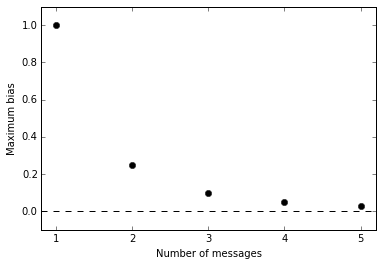

In [11]:
plt.plot(range(1,6), b_values, 'ko')
plt.ylim(-.1, 1.1)
plt.ylabel("Maximum bias")
plt.xlim(.8, 5.2)
plt.xlabel("Number of messages")
plt.axhline(0, color='k', linestyle='--')
plt.savefig("max-bias.png")
plt.show()

In [15]:
def visualize_solution(this_sol):
    n = (len(this_sol.keys()) + 1)/2
    x = np.linspace(0,b_values[n-1], num=100)
    for i in range(n-1):
        plt.plot(x, [this_sol[states[i]].subs(b, item) for item in x], 'k')
    for i in range(n):
        plt.plot(x, [this_sol[actions[i]].subs(b, item) for item in x], color='k', linestyle='--')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.xlabel("Bias")
    #plt.savefig("sol2-uniform.png")
    plt.show()

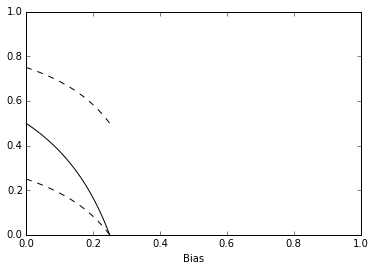

In [14]:
visualize_solution(sol2)

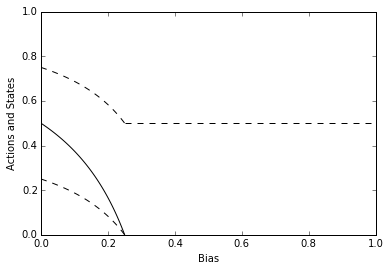

In [24]:
x = np.linspace(0,b_values[1], num=100)
for i in range(1):
    plt.plot(x, [sol2[states[i]].subs(b, item) for item in x], 'k')
for i in range(2):
    plt.plot(x, [sol2[actions[i]].subs(b, item) for item in x], color='k', linestyle='--')
plt.axhline(.5, b_values[1], 1, color='k', ls='--')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel("Bias")
plt.ylabel("Actions and States")
plt.savefig("sol2-uniform.png")
plt.show()

## Beta Distribution

## Visualize

In [10]:
from scipy.stats import beta, uniform
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

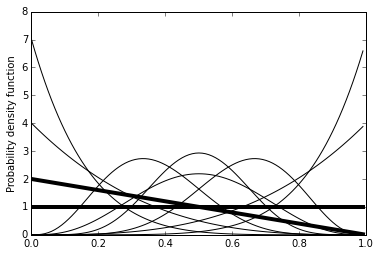

In [8]:
alpha = 1
x = np.arange (0, 1, 0.01)
for beta_var in range(1,10, 3):
    for alpha_var in range(1,10, 3):
        y = beta.pdf(x,alpha_var,beta_var)
        plt.plot(x,y, 'k')
plt.plot(x, beta.pdf(x,1,2), linewidth=4, color='k')
plt.plot(x, beta.pdf(x,1,1), linewidth=4, color='k')
plt.ylabel("Probability density function")
plt.savefig('beta-distribution.png')
plt.show()

In [6]:
from sympy.stats import Uniform, Beta, density, E, sample, P
from sympy import symbols

In [11]:
Y = Beta("y",1,2)
E(Y).evalf()

0.333333333333333

In [423]:
Y = Beta("y", 1, 2)
bias_free = min(solve(Eq(integrate(density(Y)(t), (t, 0, states[0])).evalf(), integrate(density(Y)(t), (t, states[0], 1)).evalf()), states[0]))
bias_free

0.292893218813452

In [28]:
Y = Beta("y", 1, 2)
expr = integrate(t*density(Y)(t)).evalf()
print expr.subs(t,1) - expr.subs(t,.55)
#print integrate(t*density(Y)(t), (t, 0, 0.55)).evalf()

0.141750000000000


In [412]:
Y = Beta("y", 1, 2)
print integrate(density(Y)(t), (t, 0, bias_free)).evalf()
print integrate(density(Y)(t), (t, bias_free, 1)).evalf()

0.500000000000000
0.500000000000000


In [21]:

P(Y > .5).evalf()

AttributeError: 'NoneType' object has no attribute 'probability'

In [7]:
from sympy import *

In [8]:
Y = Beta("y", 1, 2)
t = symbols('t')

In [14]:
P(Y > .2).evalf()

0.640000000000000

In [420]:
print bias_free
print integrate(t*density(Y)(t), (t, 0, bias_free)).evalf()
print integrate(t*density(Y)(t), (t, bias_free, 1)).evalf()

0.438768975845313


ValueError: Non-suitable parameters.

In [47]:
Y = Beta('y', 1, 2)
print integrate(t*density(Y)(t), (t, .55, 1)).evalf()
#print integrate(density(Y)(t), (t, 1/3.0, 2/3.0)).evalf()
#print integrate(density(Y)(t), (t, 2/3.0, 1)).evalf()

0.141750000000000


In [492]:
#
part1 = integrate(U_S(t, actions[0], b)*density(Y)(t), (t, 0, states[0]))
part2 = integrate(U_S(t, actions[1], b)*density(Y)(t), (t, states[0], states[1]))
part3 = integrate(U_S(t, actions[2], b)*density(Y)(t), (t, states[1], states[2]))

full = (part1 + part2 + part3).evalf()
print full

0.666666666666667*t0**3*(2.0*a0*b - 2.0*a0 - 3.0*b**2 + 4.0*b - 1.0) - 0.666666666666667*t0**3*(2.0*a1*b - 2.0*a1 - 3.0*b**2 + 4.0*b - 1.0) + 1.0*t0**2*(a0**2 - 4.0*a0*b + 2.0*a0 + 3.0*b**2 - 2.0*b - 1.0) - 1.0*t0**2*(a1**2 - 4.0*a1*b + 2.0*a1 + 3.0*b**2 - 2.0*b - 1.0) - 2.0*t0*(a0**2 - 2.0*a0*b + b**2 - 1.0) + 2.0*t0*(a1**2 - 2.0*a1*b + b**2 - 1.0) + 0.666666666666667*t1**3*(2.0*a1*b - 2.0*a1 - 3.0*b**2 + 4.0*b - 1.0) - 0.666666666666667*t1**3*(2.0*a2*b - 2.0*a2 - 3.0*b**2 + 4.0*b - 1.0) + 1.0*t1**2*(a1**2 - 4.0*a1*b + 2.0*a1 + 3.0*b**2 - 2.0*b - 1.0) - 1.0*t1**2*(a2**2 - 4.0*a2*b + 2.0*a2 + 3.0*b**2 - 2.0*b - 1.0) - 2.0*t1*(a1**2 - 2.0*a1*b + b**2 - 1.0) + 2.0*t1*(a2**2 - 2.0*a2*b + b**2 - 1.0) + 0.5*t2**4*(b**2 - 2.0*b + 1.0) + 0.666666666666667*t2**3*(2.0*a2*b - 2.0*a2 - 3.0*b**2 + 4.0*b - 1.0) + 1.0*t2**2*(a2**2 - 4.0*a2*b + 2.0*a2 + 3.0*b**2 - 2.0*b - 1.0) - 2.0*t2*(a2**2 - 2.0*a2*b + b**2 - 1.0)


In [475]:
solve(diff(full, states[0]), states[0])

[0.25*(-a0 - a1 + 4.0*b - sqrt((a0 + a1 - 2.0)**2) - 2.0)/(b - 1.0),
 0.25*(-a0 - a1 + 4.0*b + sqrt((a0 + a1 - 2.0)**2) - 2.0)/(b - 1.0)]

In [476]:
solve(diff(full, states[1]), states[1])

[0.25*(-a1 - a2 + 4.0*b - sqrt((a1 + a2 - 2.0)**2) - 2.0)/(b - 1.0),
 0.25*(-a1 - a2 + 4.0*b + sqrt((a1 + a2 - 2.0)**2) - 2.0)/(b - 1.0)]

In [477]:
solve(diff(full, states[2]), states[2])

[1.00000000000000, -(a2 - b - 1.0)/(b - 1.0), -(a2 - b + 1.0)/(b - 1.0)]

In [484]:
full_R = full.subs(b, 0)
print solve(diff(full_R, actions[0]), actions[0])
print solve(diff(full_R, actions[1]), actions[1])
test_sol = solve(diff(full_R, actions[2]), actions[2])

[0.333333333333333*t0*(2.0*t0 - 3.0)/(t0 - 2.0)]
[(0.666666666666667*t0**2 + 0.666666666666667*t0*t1 - t0 + 0.666666666666667*t1**2 - t1)/(t0 + t1 - 2.0)]


In [491]:
fraction(test_sol[0])[0]

0.666666666666667*t1**2 + 0.666666666666667*t1*t2 - t1 + 0.666666666666667*t2**2 - t2

In [433]:
def solve_messages_dist(m, bias):
    # Define sender symbols
    sender_partition = list(states[:(m - 1)])
    sender_points = [0] + list(states[:(m - 1)]) + [1]
    # Define receiver symbols
    receiver_partition = list(actions[:m])
    # Define prior probability
    Y = Beta('y', 1, 2)
    # Define sender expected utility
    EU_S = sum([integrate(U_S(t, item, bias)*density(Y)(t).evalf(), (t, sender_points[i], sender_points[i+1])) for i, item in enumerate(receiver_partition)])
    print "EU_S"
    print EU_S
    EU_R = EU_S.subs(b,0)
    
    #for point in sender_partition:
    #    print 
        #print point
        #print solve(diff(EU_R, point), point)
    
    #for point in receiver_partition:
    #    print 
        #print point
        #print solve(diff(EU_R, point), point)
    # Maximize sender expected utility
    sender_solutions = [Eq(point, solve(diff(EU_S, point), point)[0]) for point in sender_partition]
    #print sender_solutions
    # Maximize receiver expected utility
    receiver_solutions = [Eq(point, solve(diff(EU_R, point), point)[0]) for point in receiver_partition]    
    #print receiver_solutions
    #print tuple(sender_solutions + receiver_solutions)
    #print tuple(sender_partition + receiver_partition)
    print tuple(sender_partition + receiver_partition)
    print nsolve(tuple(sender_solutions + receiver_solutions), tuple(sender_partition + receiver_partition), (0, 0, 0))
    #print sender_partition + receiver_partition
    #return solve(sender_solutions + receiver_solutions, sender_partition + receiver_partition)

In [434]:
dist_sol2 = solve_messages_dist(2, 0)
dist_sol2 = solve_messages_dist(2, .2)
#dist_sol2 = solve_messages_dist(2, Y, .2)
#dist_sol2 = solve_messages_dist(2, Y, .25)
#dist_sol2 = solve_messages_dist(2, Y, .4)
#dist_sol3

EU_S
-1.0*a1**2 + 0.666666666666667*a1 + t0**3*(-1.33333333333333*a0 - 0.666666666666667) - t0**3*(-1.33333333333333*a1 - 0.666666666666667) + t0**2*(1.0*a0**2 + 2.0*a0 - 1.0) - t0**2*(1.0*a1**2 + 2.0*a1 - 1.0) + t0*(-2.0*a0**2 + 2.0) - t0*(-2.0*a1**2 + 2.0) + 0.833333333333333
(t0, a0, a1)
[0.381966011250105]
[0.175954681666806]
[0.587977340833403]
EU_S
-1.0*a1**2 + 0.933333333333333*a1 + t0**3*(-1.06666666666667*a0 - 0.213333333333333) - t0**3*(-1.06666666666667*a1 - 0.213333333333333) + t0**2*(1.0*a0**2 + 1.2*a0 - 1.28) - t0**2*(1.0*a1**2 + 1.2*a1 - 1.28) + t0*(-2.0*a0**2 + 0.8*a0 + 1.92) - t0*(-2.0*a1**2 + 0.8*a1 + 1.92) + 0.746666666666667
(t0, a0, a1)
[0.381966011250106]
[0.340763745333446]
[0.670381872666723]


In [31]:
x1, x2 = symbols('x1 x2')

In [40]:
expr1 = Eq(2, 2*x2 + x1)
expr2 = Eq(5, x2 - x1)

In [41]:
nsolve((expr1, expr2), (x2, x1), (.1, .1))

matrix(
[['2.33333333333333'],
 ['-2.66666666666667']])

In [424]:
dist_sol3 = solve_messages_dist(3, Y)
solve(dist_sol3[states[0]])
dist_sol4 = solve_messages_dist(4, Y)
dist_sol4[states[0]]

[t0]
1.00000000000000
-1.0*a1**2 + 1.0*a1*b + 1.0*a1 - 0.333333333333333*b**2 - 0.333333333333333*b + t0**2*(-1.0*a0*b + 1.0*a0 + 1.0*b**2 - 1.0*b) - t0**2*(-1.0*a1*b + 1.0*a1 + 1.0*b**2 - 1.0*b) + t0*(-1.0*a0**2 + 2.0*a0*b - 1.0*b**2 + 1.0) - t0*(-1.0*a1**2 + 2.0*a1*b - 1.0*b**2 + 1.0) + 0.666666666666667
[t0 == (-0.5*a0 - 0.5*a1 + b)/(b - 1.0)]
[a0 == 0.5*t0, a1 == 0.5*t0 + 0.5]
[t0, t1]
1.00000000000000
-1.0*a2**2 + 1.0*a2*b + 1.0*a2 - 0.333333333333333*b**2 - 0.333333333333333*b + t0**2*(-1.0*a0*b + 1.0*a0 + 1.0*b**2 - 1.0*b) - t0**2*(-1.0*a1*b + 1.0*a1 + 1.0*b**2 - 1.0*b) + t0*(-1.0*a0**2 + 2.0*a0*b - 1.0*b**2 + 1.0) - t0*(-1.0*a1**2 + 2.0*a1*b - 1.0*b**2 + 1.0) + t1**2*(-1.0*a1*b + 1.0*a1 + 1.0*b**2 - 1.0*b) - t1**2*(-1.0*a2*b + 1.0*a2 + 1.0*b**2 - 1.0*b) + t1*(-1.0*a1**2 + 2.0*a1*b - 1.0*b**2 + 1.0) - t1*(-1.0*a2**2 + 2.0*a2*b - 1.0*b**2 + 1.0) + 0.666666666666667
[t0 == (-0.5*a0 - 0.5*a1 + b)/(b - 1.0), t1 == (-0.5*a1 - 0.5*a2 + b)/(b - 1.0)]
[a0 == 0.5*t0, a1 == 0.5*t0 + 0.5*t

0.25*(64.0*b**3 - 80.0*b**2 + 24.0*b - 1.0)/(16.0*b**3 - 24.0*b**2 + 10.0*b - 1.0)

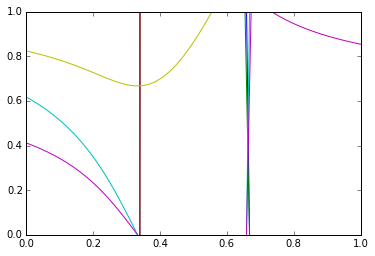

In [357]:
x = np.linspace(0,1, num=50)
#print [dist_sol2[0][0].subs(b,value) for value in x]

for solution in dist_sol2:
    for item in solution:
        plt.plot(x, [item.subs(b, value) for value in x])

plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

    #plt.plot(x, [item.subs(b, value) for value in x])
    #plt.xlabel("Bias")
    #plt.show()

In [189]:
dist_sol3 = solve_messages_dist(3, Y)
dist_sol4 = solve_messages_dist(4, Y)
dist_sol5 = solve_messages_dist(5, Y)

In [ ]:
def convert_to_integer(expr):
    return sum([key*int(value) for key, value in expr.as_coefficients_dict().iteritems()])

        
    #min_state = this_sol[states[0]]
    #print min_state
    #print factor(expand(min_state), b)
    #expr = fraction(min_state)[0]
    #print expr
    #expr_dict = expr.as_coefficients_dict()
    #print expr_dict
    #print abs(expr_dict[1])
    #test = sum([key*int(value/abs(expr_dict[1])) for key, value in expr.as_coefficients_dict().iteritems()])
    #print test
    
    
    #print solve(fraction(min_state)[0])
    #print convert_to_integer(fraction(min_state)[0]) # misses some things
    #symbolic_solutions = [re(item.evalf()) for item in solve(this_sol[states[0]], b)]
    #if symbolic_solutions:
    #    print "Symbolic solution: " + str(min(symbolic_solutions))
    #else:
    #    print "Numerical solution: " + str(nsolve(this_sol[states[0]], b, 0))        
    #print "Numerical solution: " + str(nsolve(this_sol[states[0]], b, 0))
    #print "Symbolic solution: " + str(min([re(item.evalf()) for item in solve(this_sol[states[0]], b)]))
    #return nsolve(this_sol[states[0]], b, 0)
    #return min([re(item.evalf()) for item in nsolve(this_sol[states[0]], b, 0)])

In [183]:
print sol5[states[0]]
print dist_sol5[states[0]]
print [re(item.evalf()) for item in solve(sol5[states[0]])]
print solve(sol5[states[0]].evalf())
print solve(dist_sol5[states[0]])

(256*b**4 - 448*b**3 + 240*b**2 - 40*b + 1)/(256*b**4 - 512*b**3 + 336*b**2 - 80*b + 5)
(256.0*b**4 - 448.0*b**3 + 240.0*b**2 - 40.0*b + 1.0)/(256.0*b**4 - 512.0*b**3 + 336.0*b**2 - 80.0*b + 5.0)
[0.250000000000000, 0.586824088833465, 0.883022221559489, 0.0301536896070458]
[0.250000000000000]
[0.250000000000000]


In [273]:
Z = Beta("z", 1.2 , 1)
test_sol2 = solve_messages_dist(2, Z)
print test_sol2

1.2*t**0.2
[a0, a1]
nan
nan


IndexError: list index out of range

In [179]:
print dist_sol4

{t2: 0.25*(64.0*b**3 - 96.0*b**2 + 40.0*b - 3.0)/(16.0*b**3 - 24.0*b**2 + 10.0*b - 1.0), t0: 0.25*(64.0*b**3 - 80.0*b**2 + 24.0*b - 1.0)/(16.0*b**3 - 24.0*b**2 + 10.0*b - 1.0), a1: 0.125*(128.0*b**3 - 176.0*b**2 + 60.0*b - 3.0)/(16.0*b**3 - 24.0*b**2 + 10.0*b - 1.0), t1: 0.5*(16.0*b**2 - 16.0*b + 1.0)/(8.0*b**2 - 8.0*b + 1.0), a2: 0.125*(128.0*b**3 - 192.0*b**2 + 76.0*b - 5.0)/(16.0*b**3 - 24.0*b**2 + 10.0*b - 1.0), a3: 0.125*(128.0*b**3 - 192.0*b**2 + 80.0*b - 7.0)/(16.0*b**3 - 24.0*b**2 + 10.0*b - 1.0), a0: 0.125*(64.0*b**3 - 80.0*b**2 + 24.0*b - 1.0)/(16.0*b**3 - 24.0*b**2 + 10.0*b - 1.0)}


In [425]:
    #for i, item in enumerate(receiver_partition):
    #    print density(dist)(t)
    #    print density(dist)(t).evalf()
    #    print U_S(t, item, b)*(density(dist)(t).evalf())
    #    #print U_S(t, item, b)*(density(X)(t).args[0][0])
    #    print integrate(U_S(t, item, b)*(density(X)(t).evalf()), (t, sender_points[i], sender_points[i+1]))
    # Define sender expected utility


In [181]:
print sol5[states[0]]
print sol5[states[0]].evalf()

expr = dist_sol5[states[0]]
new_expr = sum([key*int(value) for key, value in fraction(expr)[0].as_coefficients_dict().iteritems()])
print new_expr
#fraction(2*x)
#print test

#for key, value in test.iteritems():
#    print key*int(value)



(256*b**4 - 448*b**3 + 240*b**2 - 40*b + 1)/(256*b**4 - 512*b**3 + 336*b**2 - 80*b + 5)
(256.0*b**4 - 448.0*b**3 + 240.0*b**2 - 40.0*b + 1.0)/(256.0*b**4 - 512.0*b**3 + 336.0*b**2 - 80.0*b + 5.0)
256*b**4 - 448*b**3 + 240*b**2 - 40*b + 1


In [78]:
nsolve(dist_sol4[states[0]], b, 0)
#min([re(item.evalf()) for item in solve(this_sol[states[0]], b)])

mpf('0.049515566048790437')

In [55]:
#X = Beta("x", 1 , 2)
#print solve_messages_dist(3, X)

#for i, item in enumerate(receiver_partition):
    #    print density(X)(t).evalf()
    #    print U_S(t, item, b)*(density(X)(t).evalf())
        #print U_S(t, item, b)*(density(X)(t).args[0][0])
        #print integrate(U_S(t, item, b)*(density(X)(t).args[0][0]), (t, sender_points[i], sender_points[i+1]))   
        
            #EU_S = sum([integrate(U_S(t, item, b)*(density(X)(t).args[0][0]), (t, sender_points[i], sender_points[i+1])) for i, item in enumerate(receiver_partition)])
    #EU_S_test = sum([integrate(U_S(t, item, b), (t, sender_points[i], sender_points[i+1])) for i, item in enumerate(receiver_partition)])
    #print EU_S
    #print EU_S_test

0.0954915028125263

In [292]:
Y = Beta("x", 1, 1)
print solve_messages_dist(2, Y)

1.00000000000000
-1.0*(a0 - b*(-t + 1) - t)**2 + 1.0
1.00000000000000
-1.0*(a1 - b*(-t + 1) - t)**2 + 1.0
{a0: 0.25*(4.0*b - 1.0)/(2.0*b - 1.0), t0: 0.5*(4.0*b - 1.0)/(2.0*b - 1.0), a1: 0.25*(8.0*b - 3.0)/(2.0*b - 1.0)}


# OLD

In [2]:
from sympy import *
t, m, a, a_0, a_1, m_0, m_1, b = symbols('t m a a_0 a_1 m_0 m_1 b')
t_star = symbols('t_star')

In [28]:
##### This works
##### DO NOT CHANGE!
##### Copy and modify only
X = Uniform("x", 0,1)

part1 = -(a_1 - t - (1-t)*b)**2
part2 = -(a_2 - t - (1-t)*b)**2

EU_S = integrate(part1*density(X)(t), (t, 0, t_star)) + integrate(part2*density(X)(t), (t, t_star, 1))
t_diff = diff(EU_S, t_star)
t_sol = solve(t_diff, t_star)
t_sol_f = t_sol[0].args[0][0]
print t_sol_f
EU_R = EU_S.subs(b, 0)
a1_diff = diff(EU_R, a_1)
a1_sol = solve(a1_diff, a_1)
a1_sol_f = a1_sol[1].args[0][0]
a2_diff = diff(EU_R, a_2)
a2_sol = solve(a2_diff, a_2)
a2_sol_f = a2_sol[1].args[0][0]
# Solve system of equations
solve([Eq(t_star, t_sol_f), Eq(a_1, a1_sol_f), Eq(a_2, a2_sol_f)], [t_star, a_1, a_2])

(-a_1 - a_2 + 2*b)/(2*(b - 1))


{t_star: (4*b - 1)/(2*(2*b - 1)),
 a_1: (4*b - 1)/(4*(2*b - 1)),
 a_2: (8*b - 3)/(4*(2*b - 1))}

In [1]:
from sympy import *
from sympy.stats import Uniform, density, Beta, E
X = Beta("x", 1,2)

In [5]:
part1 = 1 - (actions[0] - t - (1-t)*b)**2
part2 = 1 - (actions[1] - t - (1-t)*b)**2

full_S = integrate(part1*density(X)(t).evalf(), (t, 0, states[0])) + integrate(part2*density(X)(t).evalf(), (t, states[0], 1))
full_R = full_S.subs(b, 0)

In [13]:
init_printing(use_latex='mathjax')

In [6]:
t0_sol = Eq(solve(diff(full_S, states[0]), states[0])[0], states[0])
print t0_sol

0.25*(-a0 - a1 + 4.0*b - sqrt((a0 + a1 - 2.0)**2) - 2.0)/(b - 1.0) == t0


In [14]:
t0_sol

     ⎛                      __________________      ⎞     
     ⎜                     ╱                2       ⎟     
0.25⋅⎝-a₀ - a₁ + 4.0⋅b - ╲╱  (a₀ + a₁ - 2.0)   - 2.0⎠     
───────────────────────────────────────────────────── = t₀
                       b - 1.0                            

In [7]:
a0_sol = Eq(solve(diff(full_R, actions[0]), actions[0])[0], actions[0])
print a0_sol

0.333333333333333*t0*(2.0*t0 - 3.0)/(t0 - 2.0) == a0


In [8]:
a1_sol = Eq(solve(diff(full_R, actions[1]), actions[1])[0], actions[1])
print a1_sol

0.666666666666667*t0 + 0.333333333333333 == a1


In [17]:
result = solve([t0_sol, a0_sol, a1_sol], [states[0], actions[0], actions[1]])

In [18]:
print result

[((9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b - (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0)), ((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))]


In [54]:
#result = [((9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b - (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0)), ((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))]

In [25]:
result[1]

⎛                                                                  ⎛          
⎜                                                                  ⎜          
⎜           _____________________________                          ⎜       2.0
⎜          ╱      2                              0.333333333333333⋅⎜-3.0 + ───
⎜9.0⋅b + ╲╱  9.0⋅b  - -18.0⋅(-1)⋅b + 5.0  - 3.0                    ⎝          
⎜──────────────────────────────────────────────, ─────────────────────────────
⎜                 6.0⋅b - 2.0                                                 
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎝                                                                             

 ⎛           _____________________________      ⎞⎞                            
 ⎜          ╱      2                            ⎟⎟ 

In [23]:
solve(result[1][0], b)

[0.166666666666667]

In [58]:
for item in result:
    print item[0].subs(b,0)
    print
    print item[1].subs(b,0)
    print
    print item[2].subs(b,0)
    print
    print

2.61803398874989

3.15737865166652

2.07868932583326


0.381966011250105

0.175954681666807

0.587977340833403




In [504]:
X = Beta("x", 1,2)
E(X).evalf()

0.333333333333333

In [498]:
solve(result[1][0], b)

[0.166666666666667]

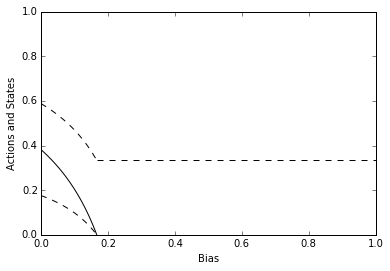

In [506]:

x = np.linspace(0,1/6.0, num=100)

plt.plot(x, [result[1][0].subs(b, value).evalf() for value in x], 'k')
plt.plot(x, [result[1][1].subs(b, value).evalf() for value in x], 'k', linestyle='--')
plt.plot(x, [result[1][2].subs(b, value).evalf() for value in x], 'k', linestyle='--')
plt.axhline(1/3.0, 1/6.0, 1, color='k', ls='--')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel("Bias")
plt.ylabel("Actions and States")
plt.savefig("sol2-beta.png")
plt.show()

In [42]:
from sympy.stats import Uniform, density, Beta
X = Beta("x", 2,1)

part1 = 1 - (actions[0] - t - (1-t)*b)**2
part2 = 1 - (actions[1] - t - (1-t)*b)**2

full_S = integrate(part1*density(X)(t).evalf(), (t, 0, states[0])) + integrate(part2*density(X)(t).evalf(), (t, states[0], 1))
full_R = full_S.subs(b, 0)

#print full_S
t0_sol = Eq(solve(diff(full_S, states[0]), states[0])[1], states[0])
print solve(diff(full_S, states[0]), states[0])
print t0_sol
a0_sol = Eq(solve(diff(full_R, actions[0]), actions[0])[0], actions[0])
print solve(diff(full_R, actions[0]), actions[0])
print a0_sol
a1_sol = Eq(solve(diff(full_R, actions[1]), actions[1])[0], actions[1])
print solve(diff(full_R, actions[1]), actions[1])
print a1_sol

result_sym = solve([t0_sol, a0_sol, a1_sol], [states[0], actions[0], actions[1]])

[0.0, 0.5*(-a0 - a1 + 2.0*b)/(b - 1.0)]
0.5*(-a0 - a1 + 2.0*b)/(b - 1.0) == t0
[0.666666666666667*t0]
0.666666666666667*t0 == a0
[0.666666666666667*(t0**3 - 1.0)/(t0**2 - 1.0)]
0.666666666666667*(t0**3 - 1.0)/(t0**2 - 1.0) == a1


In [43]:
print result_sym

[(0.5*(3.0*b - sqrt(36.0*b**2 - 24.0*b + 5.0)*Abs(3.0*b - 2.0) - 2.0)/(9.0*b**2 - 9.0*b + 2.0), 0.333333333333333*(3.0*b - sqrt(36.0*b**2 - 24.0*b + 5.0)*Abs(3.0*b - 2.0) - 2.0)/(9.0*b**2 - 9.0*b + 2.0), 0.333333333333333*(18.0*b**2 - 9.0*b + sqrt(36.0*b**2 - 24.0*b + 5.0)*Abs(3.0*b - 2.0) + 2.0)/(3.0*b - 1.0)), (0.5*(3.0*b + sqrt(36.0*b**2 - 24.0*b + 5.0)*Abs(3.0*b - 2.0) - 2.0)/(9.0*b**2 - 9.0*b + 2.0), 0.333333333333333*(3.0*b + sqrt(36.0*b**2 - 24.0*b + 5.0)*Abs(3.0*b - 2.0) - 2.0)/(9.0*b**2 - 9.0*b + 2.0), 0.333333333333333*(18.0*b**2 - 9.0*b - sqrt(36.0*b**2 - 24.0*b + 5.0)*Abs(3.0*b - 2.0) + 2.0)/(3.0*b - 1.0))]


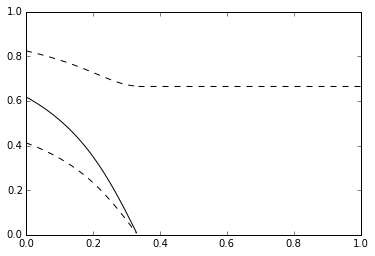

In [44]:
x = np.linspace(0,1/3.0, num=100)

plt.plot(x, [result_sym[1][0].subs(b, value).evalf() for value in x], 'k') #, linestyle='--')
plt.plot(x, [result_sym[1][1].subs(b, value).evalf() for value in x], 'k', linestyle='--')
plt.plot(x, [result_sym[1][2].subs(b, value).evalf() for value in x], 'k', linestyle='--')
plt.axhline(2/3.0, 1/3.0, 1, color='k', ls='--')
plt.ylim(0,1) 
plt.xlim(0,1)
plt.show()

In [35]:
X = Beta('x', 2, 1)
print E(X).evalf()

0.666666666666667


In [27]:
print result_sym[1][1]
nsolve(result_sym[1][1], b, 0)

0.333333333333333*(3.0*b + sqrt(36.0*b**2 - 24.0*b + 5.0)*Abs(3.0*b - 2.0) - 2.0)/(9.0*b**2 - 9.0*b + 2.0)


mpf('0.33333327100519195')

In [ ]:
##### This works
##### DO NOT CHANGE!
##### Copy and modify only
from sympy.stats import Uniform, density
X = Uniform("x", 0,1)

from sympy import *
t, a_0, a_1 = symbols('t a_0 a_1', positive=True)
b = symbols('b', positive=True)
t_star = symbols('t_star', positive=True)

part1 = 1 - (a_0 - t - (1-t)*b)**2
part2 = 1 - (a_1 - t - (1-t)*b)**2

t_sol = solve(diff(integrate(part1*density(X)(t), (t, 0, t_star)) +\
                   integrate(part2*density(X)(t), (t, t_star, 1)), t_star), t_star)
print t_sol[0].args[0][0]

In [23]:
from sympy.mpmath import *

In [24]:
X = Beta('x', 1, 2)
t = symbols('t')

In [31]:
f = lambda t : (density(X)(t)/P(X > .5))*log((density(X)(t)/P(X > .5)))
g = lambda t : (density(X)(t)/P(X > .5))*log(density(X)(t).evalf())
quad(f, [.5,1])
quad(g, [.5,1])

mpf('-0.5')

In [25]:
log(2)

mpf('0.69314718055994529')